In [3]:
from IPython.display import display
from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr

import numpy as np
import os 



from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler



cwd = os.getcwd() 
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')


if(env_name == "Localhost"):
    df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")
else: 
    df = pd.read_csv("/kaggle/input/sports-football-1872-2025/Sports_Football_1872_2025.csv")



get_start_year = 1980
get_end_year = 2024



# Country Color Coding
color_code = {
    "Finland": "#003580",  # Blue
    "Sweden": "#FECC02",  # Yellow  # FFDA00 
    "Norway": "#EF2B2D",  # Red
    "Estonia": "#0072CE",  # Blue
    "Denmark": "#C60C30",  # Red
    "Brazil": "#007A33",  # Green
    "France": "#002395",  # Blue
    "Germany": "#FFCC00",  # Black
    "Argentina": "#75AADB",  # Light Blue
    "England": "#D81E05",  # Red
    "Hungary": "#C84E42",  # Red
    "Italy": "#006400",  # Green
    "Bangladesh": "#006A4E",  # Green
    "India": "#FF9933",  # Saffron/Orange
    "South Korea": "#0F64CD",  # Saffron/Orange
    "Mexico": "#006341",  # Saffron/Orange
    "Saudi Arabia": "#165d31",  # Saffron/Orange
    "Egypt": "#C09300", 
    "United States": "#B31942", 
    "Spain": "#AA151B", 
    "Japan": "#BC002D",
    "Azerbaijan": "#0092BC",
    "Greece": "#0D5EAF",
    "Poland": "#DC143C",
    "Portugal": "#046A38",
    "Greece": "#0D5EAF",
    "Turkey": "#C8102E",
    "Wales": "#00B140",
    "Default": "#000000",
    "general_palettes" : ['00afb9', '0081a7', '5fa8d3'],
    "blue_color": '#1f77b4',  
    "orange_color": '#ff7f0e'
}

def get_country_color(country):
    """Helper function to get color for a country"""
    return color_code.get(country, color_code["Default"])

<h1 style="line-height:3rem;">1. Total Matches played by a specific country against specific opponent </h1>


Match Count: Finland vs Opponents (1980-2024, 10-year intervals)


,Finland vs Sweden,Finland vs Norway,Finland vs Denmark
Year_Group,,,
1980,8.000000,3.000000,5.000000
1990,3.000000,2.000000,2.000000
2000,4.000000,3.000000,2.000000
2010,6.000000,1.000000,1.000000
2020,2.000000,1.000000,3.000000
Total,23.000000,10.000000,13.000000
Average,4.600000,2.000000,2.600000
Std Dev,2.408319,1.000000,1.516575


<Figure size 1200x600 with 0 Axes>

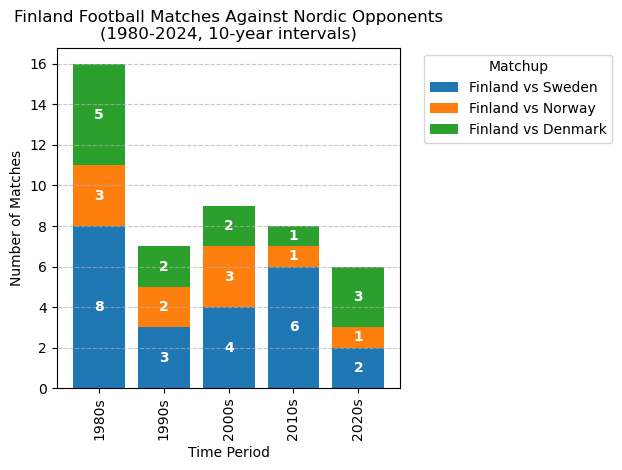

0

In [9]:

def total_matches_count_with_plot(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=20, start_year=1880, end_year=2024):
    """
    Visualizes matches played by a specified team against opponents in time intervals with both table and plot.
    
    Args:
        df: DataFrame containing match data
        team: The main team to analyze (default 'Finland')
        opponents: List of opponent teams (default ['Sweden', 'Norway', 'Denmark'])
        interval: Years per time group (default 20)
        start_year: First year to include (default 1880)
        end_year: Last year to include (default 2024)
    """
    # Filter by year range first
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches where the team played against any of the opponents
    matches = df_filtered[
        ((df_filtered['Home_team'] == team) & (df_filtered['Away_team'].isin(opponents))) |
        ((df_filtered['Away_team'] == team) & (df_filtered['Home_team'].isin(opponents)))
    ].copy()
    
    # Create complete range of year groups
    min_year = matches['Year'].min() if not matches.empty else start_year
    max_year = matches['Year'].max() if not matches.empty else end_year
    all_year_groups = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Create time groups for matches
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    
    # Create a table of matches against each opponent by time period
    results = []
    for opponent in opponents:
        # Filter matches against this opponent
        opp_matches = matches[
            ((matches['Home_team'] == team) & (matches['Away_team'] == opponent)) |
            ((matches['Away_team'] == team) & (matches['Home_team'] == opponent))
        ]
        
        # Count matches by time period
        counts = opp_matches['Year_Group'].value_counts().sort_index()
        
        # Create a Series with all time periods (including zeros)
        full_counts = pd.Series(0, index=all_year_groups['Year_Group'])
        full_counts.update(counts)
        
        results.append(full_counts)
    
    # Create the result DataFrame
    result_df = pd.concat(results, axis=1)
    result_df.columns = [f"{team} vs {opp}" for opp in opponents]
    
    # Calculate statistics before adding summary rows
    data_for_stats = result_df.copy()
    
    # Add summary rows
    result_df.loc['Total'] = data_for_stats.sum()
    result_df.loc['Average'] = data_for_stats.mean()
    result_df.loc['Std Dev'] = data_for_stats.std()
    
    # Create styled table
    styled_table = result_df.style
    
    # Apply gradient only to non-summary rows
    non_summary_rows = result_df.index[:-3]
    styled_table = styled_table.background_gradient(
        cmap='Blues', 
        subset=(non_summary_rows, result_df.columns)
    )
    
    # Format numbers
    styled_table = styled_table.format({
        'Average': '{:.2f}',
        'Std Dev': '{:.2f}'
    })
    
    # Display the table with styling
    print(f"\n{'='*70}\nMatch Count: {team} vs Opponents ({start_year}-{end_year}, {interval}-year intervals)\n{'='*70}")
    display(styled_table)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Prepare data for plotting (exclude summary rows)
    plot_data = result_df.iloc[:-3].copy()
    plot_data.index = plot_data.index.astype(str) + 's'  # Add 's' to year groups
    
    # Create stacked bar plot
    ax = plot_data.plot(kind='bar', stacked=True, width=0.8)
    
    plt.title(f'{team} Football Matches Against Nordic Opponents\n({start_year}-{end_year}, {interval}-year intervals)')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Matches')
    plt.legend(title='Matchup', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on each bar segment
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', padding=0, color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('finland_matches_plot.png', dpi=300, bbox_inches='tight')  ##############

    plt.show()

    html = styled_table.to_html()
    with open("finland_matches_table.html", "w") as f:
        f.write(html)


    
    return 0

# Example usage
total_matches_count_with_plot(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=10, start_year=get_start_year, end_year=get_end_year)

<h3 style="line-height:2rem;">From the following table, we can say that before 1990, more matches had been played, ranging between 7 and 10 every 10 years.
</h3>

<h3 style="line-height:3rem;">Finland played most matches with Sweden compared to other Nordic countries.</h3>


In [15]:
def add_year_and_result(df, team_1):
    df['Year'] = pd.to_datetime(df['Date']).dt.year

    def get_result(row):
        if row['Home_team'] == team_1 and row['home_score'] > row['away_score']:
            return "Win"
        elif row['Away_team'] == team_1 and row['away_score'] > row['home_score']:
            return "Win"
        elif row['home_score'] == row['away_score']:
            return "Draw"
        else:
            return "Loss"

    df['Result'] = df.apply(get_result, axis=1)

    df['Goals Scored'] = df.apply(
        lambda x: x['home_score'] if x['Home_team'] == team_1 else x['away_score'], axis=1)
    df['Goals Conceded'] = df.apply(
        lambda x: x['away_score'] if x['Home_team'] == team_1 else x['home_score'], axis=1)

    return df

def generate_year_interval(df, start_year, end_year, interval):
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].copy()
    df['Year Interval'] = df['Year'].apply(lambda x: f"{(x - start_year) // interval * interval + start_year}-"
                                                    f"{(x - start_year) // interval * interval + start_year + interval - 1}")
    return df

def calculate_match_stats(df, team_1, opponent, interval, start_year, end_year):
    df_filtered = df[
        (((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
         ((df['Home_team'] == opponent) & (df['Away_team'] == team_1)))
    ].copy()

    if df_filtered.empty:
        return pd.DataFrame()

    df_filtered = add_year_and_result(df_filtered, team_1)
    df_filtered = generate_year_interval(df_filtered, start_year, end_year, interval)

    grouped = df_filtered.groupby('Year Interval')

    stats = grouped.agg({
        'Result': lambda x: x.tolist(),
        'Goals Scored': ['sum', 'mean'],
        'Goals Conceded': ['sum', 'mean']
    })

    stats.columns = ['Results', 'Scored', 'Avg G.Scored', 'Conceded', 'Avg G.Conceded']
    stats.reset_index(inplace=True)

    stats['Win'] = stats['Results'].apply(lambda x: x.count('Win'))
    stats['Loss'] = stats['Results'].apply(lambda x: x.count('Loss'))
    stats['Draw'] = stats['Results'].apply(lambda x: x.count('Draw'))
    stats['Total Matches'] = stats[['Win', 'Draw', 'Loss']].sum(axis=1)

    stats['Opponent'] = opponent
    stats['Win %'] = (stats['Win'] / stats['Total Matches'] * 100).round(2)
    stats['Loss %'] = (stats['Loss'] / stats['Total Matches'] * 100).round(2)
    stats['Draw %'] = (stats['Draw'] / stats['Total Matches'] * 100).round(2)

    return stats[[
        'Year Interval', 'Opponent', 'Total Matches', 'Win', 'Loss', 'Draw',
        'Scored', 'Conceded', 'Avg G.Scored', 'Avg G.Conceded',
        'Win %', 'Loss %', 'Draw %'
    ]]

def match_result_analysis(df, team_1, opponents, interval, start_year, end_year):
    all_results = []
    for opponent in opponents:
        stats = calculate_match_stats(df, team_1, opponent, interval, start_year, end_year)
        if not stats.empty:
            all_results.append(stats)
    return pd.concat(all_results, ignore_index=True)

def display_results_table(results_df, team_1, df):
    opponents = results_df['Opponent'].unique()

    for opponent in opponents:
        print(f"\n {team_1} --- {opponent} ---")

        sub_df = results_df[results_df['Opponent'] == opponent].copy()

        filtered_df = df[
            (((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
             ((df['Home_team'] == opponent) & (df['Away_team'] == team_1)))
        ]

        overall_std_scored = filtered_df['Goals Scored'].std()
        overall_std_conceded = filtered_df['Goals Conceded'].std()

        total_matches = sub_df['Total Matches'].sum()
        total_scored = sub_df['Scored'].sum()
        total_conceded = sub_df['Conceded'].sum()
        total_row = {
            "Year Interval": "TOTAL",
            "Opponent": opponent,
            "Total Matches": total_matches,
            "Win": sub_df['Win'].sum(),
            "Loss": sub_df['Loss'].sum(),
            "Draw": sub_df['Draw'].sum(),
            "Scored": total_scored,
            "Conceded": total_conceded,
            "Avg G.Scored": total_scored / total_matches,
            "Avg G.Conceded": total_conceded / total_matches,
            "Win %": round((sub_df['Win'].sum() / total_matches) * 100, 2),
            "Loss %": round((sub_df['Loss'].sum() / total_matches) * 100, 2),
            "Draw %": round((sub_df['Draw'].sum() / total_matches) * 100, 2),
        }

        std_row = {
            "Year Interval": "STD DEV",
            "Opponent": opponent,
            "Total Matches": None,
            "Win": None,
            "Loss": None,
            "Draw": None,
            "Scored": None,
            "Conceded": None,
            "Avg G.Scored": overall_std_scored,
            "Avg G.Conceded": overall_std_conceded,
            "Win %": None,
            "Loss %": None,
            "Draw %": None,
        }

        combined_df = pd.concat([sub_df, pd.DataFrame([total_row, std_row])], ignore_index=True)

        styled = combined_df.style.background_gradient(
            cmap='Blues',
            subset=pd.IndexSlice[combined_df.index[:-1], [
                "Total Matches", "Win", "Loss", "Draw",
                "Scored", "Conceded", "Avg G.Scored", "Avg G.Conceded",
                "Win %", "Loss %", "Draw %"
            ]]
        ).set_properties(**{'text-align': 'center'}).set_table_styles(
            [dict(selector='th', props=[('text-align', 'center')])]
        )

        display(styled)

        # === SAVE TO HTML FILE ===
        html = styled.to_html()
        filename = f"{team_1}_vs_{opponent}.html".replace(" ", "_")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(html)

def run_team_analysis(df, team_1, opponents, interval=10, start_year=1960, end_year=2024):
    df = add_year_and_result(df, team_1)
    results_df = match_result_analysis(df, team_1, opponents, interval, start_year, end_year)

    if results_df.empty:
        print("No match data found for the specified criteria.")
        return

    display_results_table(results_df, team_1, df)

# Example usage
run_team_analysis(
    df,
    team_1="Finland",
    opponents=["Sweden", "Norway", "Denmark"],
    interval=10,
    start_year=get_start_year,
    end_year=get_end_year
)



 Finland --- Sweden ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Scored,Conceded,Avg G.Scored,Avg G.Conceded,Win %,Loss %,Draw %
0,1980-1989,Sweden,8.000000,2.000000,5.000000,1.000000,7.000000,14.000000,0.875000,1.750000,25.000000,62.500000,12.500000
1,1990-1999,Sweden,3.000000,0.000000,3.000000,0.000000,2.000000,10.000000,0.666667,3.333333,0.000000,100.000000,0.000000
2,2000-2009,Sweden,4.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0.500000,1.000000,25.000000,50.000000,25.000000
3,2010-2019,Sweden,6.000000,2.000000,4.000000,0.000000,3.000000,13.000000,0.500000,2.166667,33.330000,66.670000,0.000000
4,2020-2029,Sweden,2.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000,100.000000,0.000000
5,TOTAL,Sweden,23.000000,5.000000,16.000000,2.000000,14.000000,45.000000,0.608696,1.956522,21.740000,69.570000,8.700000
6,STD DEV,Sweden,nan,nan,nan,nan,nan,nan,1.158185,2.247397,nan,nan,nan



 Finland --- Norway ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Scored,Conceded,Avg G.Scored,Avg G.Conceded,Win %,Loss %,Draw %
0,1980-1989,Norway,3.000000,1.000000,1.000000,1.000000,5.000000,8.000000,1.666667,2.666667,33.330000,33.330000,33.330000
1,1990-1999,Norway,2.000000,0.000000,1.000000,1.000000,1.000000,5.000000,0.500000,2.500000,0.000000,50.000000,50.000000
2,2000-2009,Norway,3.000000,1.000000,2.000000,0.000000,5.000000,6.000000,1.666667,2.000000,33.330000,66.670000,0.000000
3,2010-2019,Norway,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,100.000000,0.000000
4,2020-2029,Norway,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,100.000000
5,TOTAL,Norway,10.000000,2.000000,5.000000,3.000000,12.000000,22.000000,1.200000,2.200000,20.000000,50.000000,30.000000
6,STD DEV,Norway,nan,nan,nan,nan,nan,nan,1.096724,2.267654,nan,nan,nan



 Finland --- Denmark ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Scored,Conceded,Avg G.Scored,Avg G.Conceded,Win %,Loss %,Draw %
0,1980-1989,Denmark,5.000000,0.000000,4.000000,1.000000,3.000000,7.000000,0.600000,1.400000,0.000000,80.000000,20.000000
1,1990-1999,Denmark,2.000000,0.000000,2.000000,0.000000,1.000000,3.000000,0.500000,1.500000,0.000000,100.000000,0.000000
2,2000-2009,Denmark,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.500000,1.000000,0.000000,50.000000,50.000000
3,2010-2019,Denmark,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,100.000000,0.000000
4,2020-2029,Denmark,3.000000,1.000000,2.000000,0.000000,2.000000,4.000000,0.666667,1.333333,33.330000,66.670000,0.000000
5,TOTAL,Denmark,13.000000,1.000000,10.000000,2.000000,8.000000,18.000000,0.615385,1.384615,7.690000,76.920000,15.380000
6,STD DEV,Denmark,nan,nan,nan,nan,nan,nan,0.938806,2.077863,nan,nan,nan


<h4 style="line-height:2rem;">

Analysis of the tables reveals that Finland's performance against Norway is relatively stronger, with an approximate 18% win rate and a 41% draw rate. A key observation is that Finland scores more goals against Norway and the least against Denmark compared to other Nordic teams, highlighting a strong correlation between goal scoring and match outcomes.

Defensively, Finland performs better against Denmark but worse against Sweden. This difference is mirrored in their win percentages, with Finland winning only about 5% of their games against Denmark and around 17% against Sweden
</h4>

# Forward or Score by Opponent Teams

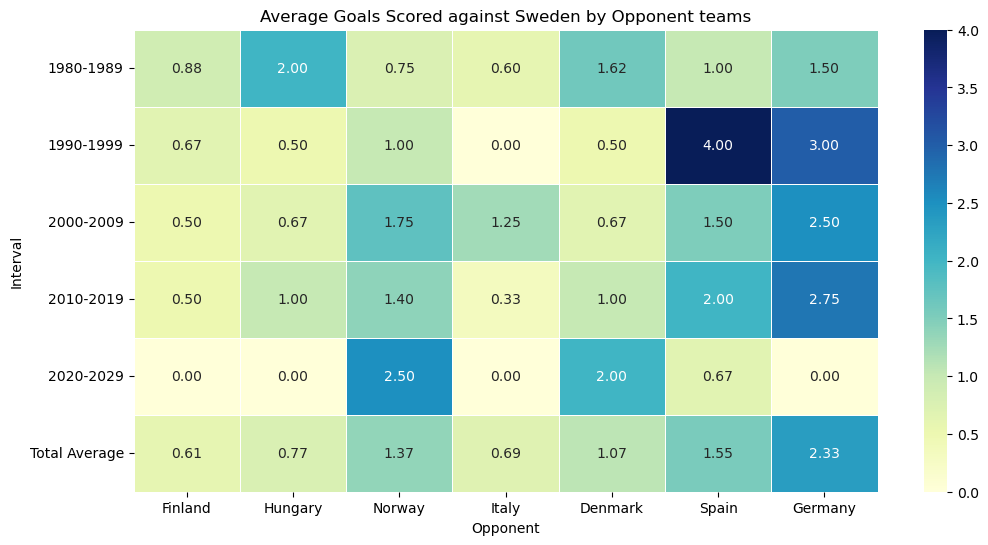

In [21]:
def detailed_defensive_summary(df, team_1="Sweden", opposite_teams=None,
                              interval_time=10, start_year=1990, end_year=2022):
    if opposite_teams is None:
        opposite_teams = ["Finland", "Hungary", "Norway", "Germany", "Italy", "Spain"]

    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year

    # Filter matches where team_1 played and opponent is in opposite_teams
    df_filtered = df[
        (df['year'] >= start_year) & (df['year'] <= end_year) &
        ((df['Home_team'] == team_1) | (df['Away_team'] == team_1)) &
        ((df['Home_team'].isin(opposite_teams)) | (df['Away_team'].isin(opposite_teams)))
    ]

    # Store per-interval data here
    rows = []
    
    # For summary calculations
    total_scored = {team: 0 for team in opposite_teams}
    total_matches = {team: 0 for team in opposite_teams}
    scored_goals_list = {team: [] for team in opposite_teams}

    # Loop through intervals
    for start in range(start_year, end_year + 1, interval_time):
        end = start + interval_time - 1
        interval_df = df_filtered[(df_filtered['year'] >= start) & (df_filtered['year'] <= end)]
        row = {}

        for opponent in opposite_teams:
            scored = 0
            matches = 0

            # If team_1 is home, scored goals = away_score by opponent
            home_matches = interval_df[(interval_df['Home_team'] == team_1) & (interval_df['Away_team'] == opponent)]
            scored += home_matches['away_score'].sum()
            matches += len(home_matches)
            scored_goals_list[opponent].extend(home_matches['away_score'].tolist())

            # If team_1 is away, scored goals = home_score by opponent
            away_matches = interval_df[(interval_df['Away_team'] == team_1) & (interval_df['Home_team'] == opponent)]
            scored += away_matches['home_score'].sum()
            matches += len(away_matches)
            scored_goals_list[opponent].extend(away_matches['home_score'].tolist())

            total_scored[opponent] += scored
            total_matches[opponent] += matches

            avg = scored / matches if matches else 0

            # Store data under tuple keys for MultiIndex columns
            row[(opponent, 'Scored')] = scored
            row[(opponent, 'Total Match')] = matches
            row[(opponent, 'Avg')] = round(avg, 2)

        rows.append((f"{start}-{end}", row))

    # Create dataframe from rows
    index = []
    data = []
    for interval, row in rows:
        index.append(interval)
        data.append(row)

    # Create MultiIndex columns
    tuples = []
    for opponent in opposite_teams:
        for stat in ['Scored', 'Total Match', 'Avg']:
            tuples.append((opponent, stat))

    columns = pd.MultiIndex.from_tuples(tuples, names=['Opponent', 'Statistic'])
    df_intervals = pd.DataFrame(data, index=index, columns=columns)

    # Add summary rows: Total, AVG, STD
    total_row = {}
    avg_row = {}
    std_row = {}

    for opponent in opposite_teams:
        total = total_scored[opponent]
        matches = total_matches[opponent]
        avg = total / matches if matches else 0
        std = round(np.std(scored_goals_list[opponent]), 2) if scored_goals_list[opponent] else 0

        total_row[(opponent, 'Scored')] = total
        total_row[(opponent, 'Total Match')] = matches
        total_row[(opponent, 'Avg')] = round(avg, 2)

        avg_row[(opponent, 'Scored')] = ''
        avg_row[(opponent, 'Total Match')] = ''
        avg_row[(opponent, 'Avg')] = round(avg, 2)  # fixed AVG row to show average

        std_row[(opponent, 'Scored')] = ''
        std_row[(opponent, 'Total Match')] = ''
        std_row[(opponent, 'Avg')] = std

    df_summary = pd.DataFrame(
        [total_row, avg_row, std_row],
        index=['Total', 'AVG', 'STD'],
        columns=columns
    )

    # Combine intervals and summary rows
    df_final = pd.concat([df_intervals, df_summary])

    # Add 'Interval' as first column for clarity
    df_final.reset_index(inplace=True)
    df_final.rename(columns={'index': 'Interval'}, inplace=True)

    # Style gradient for 'Avg' columns but exclude 'Total Match' and summary rows
    def highlight_gradients(s):
        is_avg = s.name[1] == 'Avg'
        if not is_avg:
            return ['' for _ in s]

        result = []
        for idx, val in enumerate(s):
            if s.index[idx] in ['Total', 'AVG', 'STD']:
                result.append('')
            else:
                try:
                    num = float(val)
                    if num > 0:
                        result.append('background-color: #a8ddb5')  # light green
                    else:
                        result.append('')
                except:
                    result.append('')
        return result

    styled = df_final.style
    styled = styled.apply(highlight_gradients, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Avg']])
    styled = styled.format(precision=2, na_rep='')

    return styled, df_final


def plot_avg_scored_heatmap(df_final, opposite_teams, team_1):
    interval_df = df_final[~df_final['Interval'].isin(['Total', 'AVG', 'STD'])].copy()

    avg_cols = [(team, 'Avg') for team in opposite_teams]
    heatmap_data = interval_df.set_index('Interval')[avg_cols]
    heatmap_data.columns = [team for team, stat in avg_cols]

    # Calculate total averages for each opponent (from summary 'Total' row)
    total_row = df_final[df_final['Interval'] == 'Total']
    total_avgs = {}
    for team in opposite_teams:
        total_scored = total_row[(team, 'Scored')].values[0]
        total_matches = total_row[(team, 'Total Match')].values[0]
        total_avg = total_scored / total_matches if total_matches else 0
        total_avgs[team] = total_avg

    # Create a DataFrame for the total average row
    total_avg_df = pd.DataFrame(total_avgs, index=['Total Average'])

    # Concatenate the new row to heatmap_data
    heatmap_data = pd.concat([heatmap_data, total_avg_df])

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
    plt.title(f"Average Goals Scored against {team_1} by Opponent teams")
    plt.ylabel("Interval")
    plt.xlabel("Opponent")
    plt.savefig("Defense_Summary.png", bbox_inches='tight')
    plt.show()



# Usage example:

styled_table, df_final = detailed_defensive_summary(
    df,
    team_1="Sweden",
    opposite_teams=["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"],
    interval_time=10,
    start_year=get_start_year,
    end_year=get_end_year
)

# display(styled_table)  # works in Jupyter or compatible notebook

plot_avg_scored_heatmap(
    df_final,
    ["Finland",  "Hungary", "Norway", "Italy", "Denmark","Spain", "Germany"],
    team_1="Sweden"
)


<h4 style="line-height:2rem;">
The tables indicate that Finland has the lowest goal-scoring record against Sweden among the European countries listed: Norway, Italy, Denmark, Hungary, Spain, and Germany. Notably, Finland's average goals against Sweden is similar to Hungary's.

Norway scores more effectively against Sweden than Finland and Denmark.
</h4>

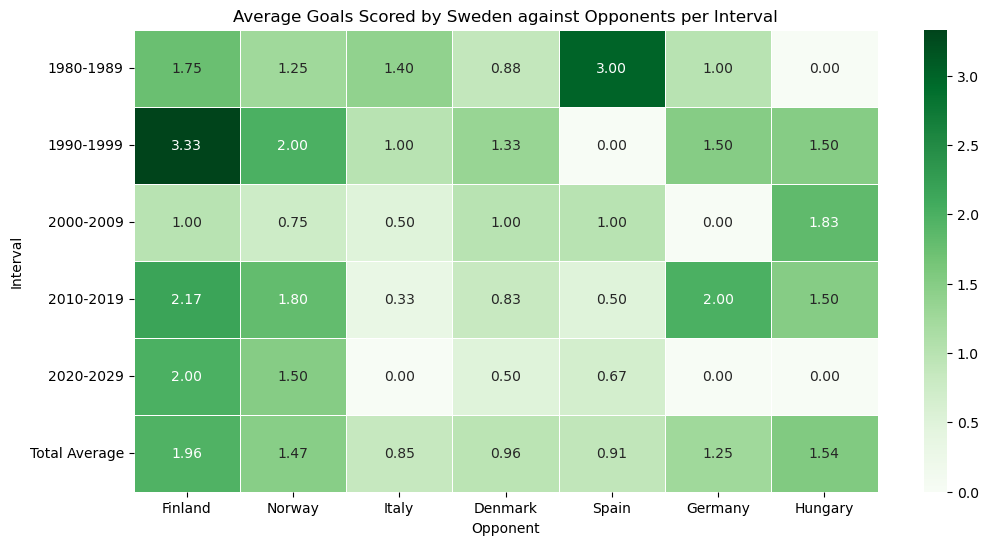

In [23]:
def detailed_opponent_conceded_summary(df, team_1="Sweden", opposite_teams=None,
                                       interval_time=10, start_year=1990, end_year=2022):
    if opposite_teams is None:
        opposite_teams = ["Finland", "Hungary", "Norway", "Germany", "Italy", "Spain"]

    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year

    # Filter matches where team_1 played and opponent is in opposite_teams
    df_filtered = df[
        (df['year'] >= start_year) & (df['year'] <= end_year) &
        ((df['Home_team'] == team_1) | (df['Away_team'] == team_1)) &
        ((df['Home_team'].isin(opposite_teams)) | (df['Away_team'].isin(opposite_teams)))
    ]

    rows = []

    total_conceded_by_opponent = {team: 0 for team in opposite_teams}
    total_matches = {team: 0 for team in opposite_teams}
    goals_by_team1_list = {team: [] for team in opposite_teams}

    for start in range(start_year, end_year + 1, interval_time):
        end = start + interval_time - 1
        interval_df = df_filtered[(df_filtered['year'] >= start) & (df_filtered['year'] <= end)]
        row = {}

        for opponent in opposite_teams:
            conceded_by_opponent = 0
            matches = 0

            # Sweden is home, goals conceded by opponent = Sweden's home_score
            home_matches = interval_df[(interval_df['Home_team'] == team_1) & (interval_df['Away_team'] == opponent)]
            conceded_by_opponent += home_matches['home_score'].sum()
            matches += len(home_matches)
            goals_by_team1_list[opponent].extend(home_matches['home_score'].tolist())

            # Sweden is away, goals conceded by opponent = Sweden's away_score
            away_matches = interval_df[(interval_df['Away_team'] == team_1) & (interval_df['Home_team'] == opponent)]
            conceded_by_opponent += away_matches['away_score'].sum()
            matches += len(away_matches)
            goals_by_team1_list[opponent].extend(away_matches['away_score'].tolist())

            total_conceded_by_opponent[opponent] += conceded_by_opponent
            total_matches[opponent] += matches

            avg = conceded_by_opponent / matches if matches else 0

            row[(opponent, 'Conceded')] = conceded_by_opponent
            row[(opponent, 'Total Match')] = matches
            row[(opponent, 'Avg')] = round(avg, 2)

        rows.append((f"{start}-{end}", row))

    tuples = []
    for opponent in opposite_teams:
        for stat in ['Conceded', 'Total Match', 'Avg']:
            tuples.append((opponent, stat))
    columns = pd.MultiIndex.from_tuples(tuples, names=['Opponent', 'Statistic'])

    index = []
    data = []
    for interval, row in rows:
        index.append(interval)
        data.append(row)

    df_intervals = pd.DataFrame(data, index=index, columns=columns)

    # Summary rows
    total_row = {}
    avg_row = {}
    std_row = {}

    for opponent in opposite_teams:
        total = total_conceded_by_opponent[opponent]
        matches = total_matches[opponent]
        avg = total / matches if matches else 0
        std = round(np.std(goals_by_team1_list[opponent]), 2) if goals_by_team1_list[opponent] else 0

        total_row[(opponent, 'Conceded')] = total
        total_row[(opponent, 'Total Match')] = matches
        total_row[(opponent, 'Avg')] = round(avg, 2)

        avg_row[(opponent, 'Conceded')] = ''
        avg_row[(opponent, 'Total Match')] = ''
        avg_row[(opponent, 'Avg')] = round(avg, 2)

        std_row[(opponent, 'Conceded')] = ''
        std_row[(opponent, 'Total Match')] = ''
        std_row[(opponent, 'Avg')] = std

    df_summary = pd.DataFrame(
        [total_row, avg_row, std_row],
        index=['Total', 'AVG', 'STD'],
        columns=columns
    )

    df_final = pd.concat([df_intervals, df_summary])
    df_final.reset_index(inplace=True)
    df_final.rename(columns={'index': 'Interval'}, inplace=True)

    def highlight_gradients(s):
        is_avg = s.name[1] == 'Avg'
        if not is_avg:
            return ['' for _ in s]
        result = []
        for idx, val in enumerate(s):
            if s.index[idx] in ['Total', 'AVG', 'STD']:
                result.append('')
            else:
                try:
                    num = float(val)
                    if num > 0:
                        result.append('background-color: #a6d96a')  # greenish for scored/conceded by opponent
                    else:
                        result.append('')
                except:
                    result.append('')
        return result

    styled = df_final.style
    styled = styled.apply(highlight_gradients, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Avg']])
    styled = styled.format(precision=2, na_rep='')

    return styled, df_final

def plot_avg_conceded_heatmap(df_final, opposite_teams, team_1="Sweden"):
    interval_df = df_final[~df_final['Interval'].isin(['Total', 'AVG', 'STD'])].copy()

    avg_cols = [(team, 'Avg') for team in opposite_teams]
    heatmap_data = interval_df.set_index('Interval')[avg_cols]
    heatmap_data.columns = [team for team, stat in avg_cols]

    total_row = df_final[df_final['Interval'] == 'Total']
    total_avgs = {}
    for team in opposite_teams:
        total_conceded = total_row[(team, 'Conceded')].values[0]
        total_matches = total_row[(team, 'Total Match')].values[0]
        total_avg = total_conceded / total_matches if total_matches else 0
        total_avgs[team] = total_avg

    total_avg_df = pd.DataFrame(total_avgs, index=['Total Average'])
    heatmap_data = pd.concat([heatmap_data, total_avg_df])

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
    plt.title(f"Average Goals Scored by {team_1} against Opponents per Interval")
    plt.ylabel("Interval")
    plt.xlabel("Opponent")
    plt.savefig('conceded_goal_headtamp.png', dpi=300, bbox_inches='tight')
    plt.show()


# Usage example:

styled_table, df_final = detailed_opponent_conceded_summary(
    df,
    team_1="Sweden",
    opposite_teams=["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"],
    interval_time=10,
    start_year=get_start_year,
    end_year=get_end_year
)

# display(styled_table)
plot_avg_conceded_heatmap(df_final, ["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"])


<h4 style="line-height:2rem;"> This analysis reveals which team defense performs better against Sweden, or, conversely, how effectively Sweden's forwards are performing. It also shows that Finland's defense is weaker compared to other nations, with Italy, Denmark, and Spain demonstrating similar defensive strengths. 
</h4>

K Means

,Team,Avg Goal Diff,Win Rate,Cluster
22,United States,0.526235,0.478395,0
1,Saudi Arabia,0.529940,0.483533,0
2,South Korea,0.801471,0.508824,0
5,Mexico,0.736769,0.518106,0
16,Argentina,0.840074,0.553309,0
15,Japan,0.894198,0.525597,0
8,Egypt,0.655987,0.500843,0
14,Denmark,0.589958,0.491632,0
10,China PR,0.650450,0.450450,0
12,Sweden,0.596296,0.487037,0


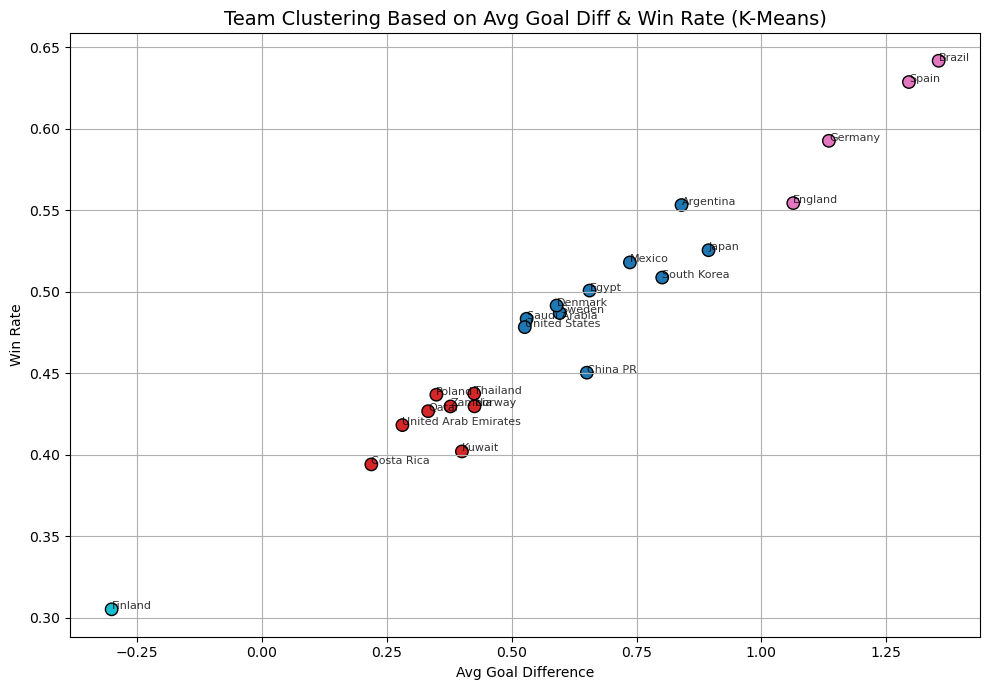

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

def cluster_team_by_performance(df, top_n=60, start_year=2000, end_year=2022,
                                 include_team=None, team_list=None, n_clusters=4):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df = df[df['Year'].between(start_year, end_year)]

    all_teams = pd.unique(df[['Home_team', 'Away_team']].values.ravel())
    stats = []

    for team in all_teams:
        team_matches = df[(df['Home_team'] == team) | (df['Away_team'] == team)]
        if team_matches.empty:
            continue

        goals_scored = 0
        goals_conceded = 0
        wins = 0
        matches = 0

        for _, row in team_matches.iterrows():
            if row['Home_team'] == team:
                scored, conceded = row['home_score'], row['away_score']
                win = row['home_score'] > row['away_score']
            else:
                scored, conceded = row['away_score'], row['home_score']
                win = row['away_score'] > row['home_score']

            goals_scored += scored
            goals_conceded += conceded
            wins += int(win)
            matches += 1

        if matches == 0:
            continue

        stats.append({
            'Team': team,
            'Avg Goal Diff': (goals_scored - goals_conceded) / matches,
            'Win Rate': wins / matches,
            'Matches': matches
        })

    df_stats = pd.DataFrame(stats)

    # Filter logic: use team_list or top_n
    if team_list:
        selected_teams = set(team_list)
    else:
        selected_teams = set(df_stats.sort_values(by='Matches', ascending=False).head(top_n)['Team'])

    if include_team:
        if isinstance(include_team, str):
            include_team = [include_team]
        selected_teams.update(include_team)

    df_stats = df_stats[df_stats['Team'].isin(selected_teams)].reset_index(drop=True)

    # Normalize for clustering
    features = df_stats[['Avg Goal Diff', 'Win Rate']]
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(features)

    # K-Means clustering
    if len(df_stats) < n_clusters:
        raise ValueError("Number of teams is less than the number of clusters.")
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    df_stats['Cluster'] = kmeans.fit_predict(normalized)

    # Gradient-style display
    styled_df = df_stats[['Team', 'Avg Goal Diff', 'Win Rate', 'Cluster']].sort_values(by='Cluster')
    display(styled_df.style.background_gradient(cmap='coolwarm', subset=['Avg Goal Diff', 'Win Rate']))

    # 2D scatter plot
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(
        df_stats['Avg Goal Diff'], df_stats['Win Rate'],
        c=df_stats['Cluster'], cmap='tab10', s=80, edgecolor='k'
    )

    for _, row in df_stats.iterrows():
        plt.text(row['Avg Goal Diff'], row['Win Rate'], row['Team'], fontsize=8, alpha=0.8)

    plt.xlabel('Avg Goal Difference')
    plt.ylabel('Win Rate')
    plt.title('Team Clustering Based on Avg Goal Diff & Win Rate (K-Means)', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Performance_Clustering.png', dpi=300, bbox_inches='tight')

    plt.show()

    return df_stats





clustered_df = cluster_team_by_performance(
    df,
    start_year=get_start_year,
    end_year=get_end_year,
    include_team=['Finland', 'Sweden', 'Norway', 'Denmark'],
    top_n=20
)



📈 Pearson Correlation between Finland and Sweden goals: -0.20
📉 P-value: 0.3558

✅ Win/Draw Counts:
{'Finland': 5, 'Sweden': 16, 'Draw': 2}


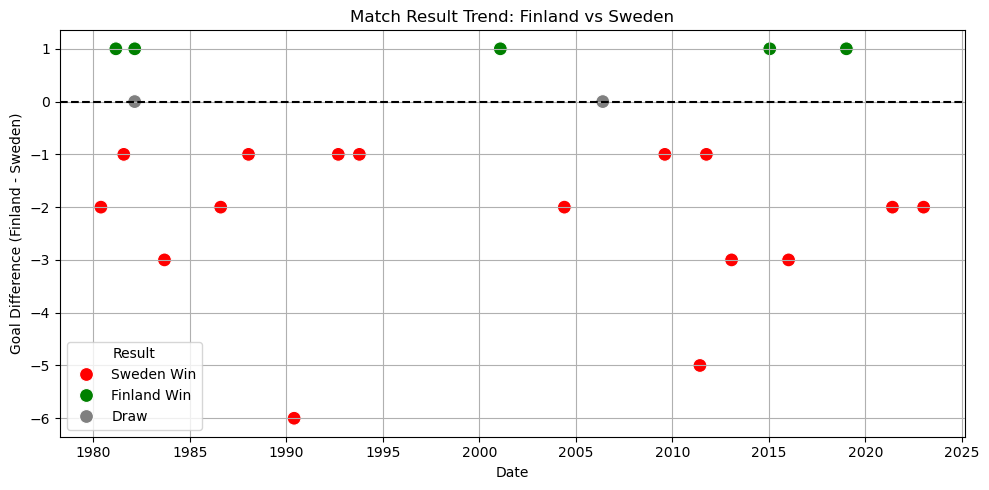

,Average,Std Dev
Finland,0.61,0.78
Sweden,1.96,1.55


,Date,Finland_goals,Sweden_goals,goal_diff,Result
12250,1980-05-22 00:00:00,0,2,-2,Sweden Win
12670,1981-03-01 00:00:00,2,1,1,Finland Win
12904,1981-07-29 00:00:00,0,1,-1,Sweden Win
13170,1982-02-20 00:00:00,2,2,0,Draw
13172,1982-02-21 00:00:00,2,1,1,Finland Win
13853,1983-09-07 00:00:00,0,3,-3,Sweden Win
15416,1986-08-06 00:00:00,1,3,-2,Sweden Win
15981,1988-01-15 00:00:00,0,1,-1,Sweden Win
17313,1990-05-27 00:00:00,0,6,-6,Sweden Win
18487,1992-09-09 00:00:00,0,1,-1,Sweden Win


In [183]:


def analyze_goal_differences(df, team_1="France", team_2="Germany", match_number=100, start_year=2000, end_year=2024):
    # Convert date and extract year
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year

    # Filter by teams and date
    filtered = df[
        ((df['Home_team'] == team_1) & (df['Away_team'] == team_2)) |
        ((df['Home_team'] == team_2) & (df['Away_team'] == team_1))
    ]
    filtered = filtered[(filtered['Year'] >= start_year) & (filtered['Year'] <= end_year)]
    filtered = filtered.sort_values(by='Date', ascending=False).head(match_number).copy()

    # Extract goals
    def get_goals(row, team):
        if row['Home_team'] == team:
            return row['home_score']
        elif row['Away_team'] == team:
            return row['away_score']
        return None

    filtered[f'{team_1}_goals'] = filtered.apply(lambda row: get_goals(row, team_1), axis=1)
    filtered[f'{team_2}_goals'] = filtered.apply(lambda row: get_goals(row, team_2), axis=1)
    filtered.dropna(subset=[f'{team_1}_goals', f'{team_2}_goals'], inplace=True)

    # Compute goal difference
    filtered['goal_diff'] = filtered[f'{team_1}_goals'] - filtered[f'{team_2}_goals']

    # Pearson correlation
    corr, p_value = pearsonr(filtered[f'{team_1}_goals'], filtered[f'{team_2}_goals'])

    # Win/Draw counts
    win_counts = {
        team_1: sum(filtered['goal_diff'] > 0),
        team_2: sum(filtered['goal_diff'] < 0),
        "Draw": sum(filtered['goal_diff'] == 0)
    }

    print(f"\n📈 Pearson Correlation between {team_1} and {team_2} goals: {corr:.2f}")
    print(f"📉 P-value: {p_value:.4f}")
    print("\n✅ Win/Draw Counts:")
    print(win_counts)

    # Label result
    filtered['Result'] = filtered['goal_diff'].apply(
        lambda x: f"{team_1} Win" if x > 0 else f"{team_2} Win" if x < 0 else "Draw"
    )

    # Plot trend
    plt.figure(figsize=(10, 5))
    color_map = {f'{team_1} Win': 'green', f'{team_2} Win': 'red', 'Draw': 'gray'}
    sns.scatterplot(x='Date', y='goal_diff', hue='Result', palette=color_map, data=filtered, s=100)

    plt.axhline(0, color='black', linestyle='--')
    plt.title(f"Match Result Trend: {team_1} vs {team_2}")
    plt.ylabel(f"Goal Difference ({team_1} - {team_2})")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Compute and display average and std deviation of goals
    result_df = pd.DataFrame({
        'Average': [
            filtered[f'{team_1}_goals'].mean(),
            filtered[f'{team_2}_goals'].mean()
        ],
        'Std Dev': [
            filtered[f'{team_1}_goals'].std(),
            filtered[f'{team_2}_goals'].std()
        ]
    }, index=[team_1, team_2])

    styled_stats = result_df.style.background_gradient(cmap='Blues').format({
        'Average': '{:.2f}',
        'Std Dev': '{:.2f}'
    }).set_caption(f"Goal Statistics: {team_1} vs {team_2}")

    display(HTML(styled_stats.to_html()))

    # Styled match-level table
    styled_table = filtered[['Date', f'{team_1}_goals', f'{team_2}_goals', 'goal_diff', 'Result']] \
        .sort_values(by='Date', ascending=True) \
        .style.background_gradient(cmap='coolwarm', subset=['goal_diff']) \
        .set_caption(f"Goal Differences: {team_1} vs {team_2}") \
        .format(na_rep="-")

    return styled_table


# Load dataset

# Run analysis
styled_result = analyze_goal_differences(
    df, 
    team_1="Finland", 
    team_2="Sweden", 
    match_number=1000, 
    start_year=get_start_year, 
    end_year=get_end_year
)

# Display styled match-level table
display(HTML(styled_result.to_html()))
